<a href="https://colab.research.google.com/github/Joyfreaky/SVHN-Digit-Recognition/blob/main/INN_Additional_Project_SVHN_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks: SVHN Digit Recognition

## Problem Statement

### Context

The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications. The Street View House Numbers (SVHN) dataset is one of the most popular ones. It has been used in neural networks created by Google to read house numbers and match them to their geolocations.

### Objective

To build a model that can identify house numbers in an image.

### Data Dictionary

- Number of classes: 10
- Training data: 42000 images
- Testing data: 18000 images

## Importing necessary libraries

In [ ]:
!pip install tensorflow==2.15.0 pandas==1.5.3 scikit-learn==1.2.2 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 -q --user

Note: After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn import metrics
from tensorflow.keras import backend
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
import random
#Importing classback API
from keras import callbacks
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import losses

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip 'Train.zip'

Archive:  Train.zip
  inflating: Train/X_train.csv       
  inflating: Train/y_train.csv       


In [ ]:
!unzip 'Test.zip'

Archive:  Test.zip
  inflating: Test/X_test.csv         
  inflating: Test/y_test.csv         


## Loading the dataset

In [ ]:
## Reading the dataset
X_test = pd.read_csv("Test/X_test.csv")
X_train = pd.read_csv("Train/X_train.csv")
y_test = pd.read_csv("Test/y_test.csv")
y_train = pd.read_csv("Train/y_train.csv")

**NOTE**: Since the data shared is in X_train, X_test, y_train, and y_test, there is no need to split the data further.

In [ ]:
# Display the first few rows of each DataFrame to understand their structure

print("X_train:")
display(X_train.head())

print("\ny_train:")
display(y_train.head())

print("\nX_test:")
display(X_test.head())

print("\ny_test:")
display(y_test.head())

X_train:


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,33.0704,30.2601,26.8520,25.8844,28.5421,33.1673,33.9069,31.2770,27.3313,23.9556,...,37.5877,38.4736,41.1852,45.0816,46.0923,45.2172,47.2062,49.6682,50.8530,53.0377
1,86.9591,87.0685,88.3735,88.2272,87.0424,88.0746,89.0637,89.6399,87.6401,87.4121,...,91.2313,90.5303,91.3992,92.6379,92.5409,89.9649,80.9103,75.2206,76.6396,79.2865
2,123.1250,125.8581,122.0757,116.0054,112.1629,110.7932,112.1351,112.8361,112.7221,112.7822,...,69.8046,72.1033,73.9891,75.6469,76.0059,77.1368,84.0930,93.9349,104.7875,113.8252
3,147.6196,139.6204,142.6201,147.2175,151.9181,155.6188,157.6186,158.6185,159.1023,158.5153,...,125.1057,133.1049,143.1039,151.7933,158.4398,157.8420,157.1302,157.1194,157.1795,157.1795
4,153.9890,155.1783,157.4276,157.2319,158.2919,161.0205,162.9880,163.9448,160.9451,156.9347,...,112.6602,91.5529,72.6303,58.7565,45.3988,38.2747,40.5410,45.6930,48.6172,58.1494



y_train:


,0
0,2
1,6
2,7
3,4
4,4



X_test:


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,40.5580,46.7917,48.9764,55.0205,67.3568,71.6276,64.9102,61.9536,70.8064,74.8831,...,84.5986,87.8864,92.3482,100.6956,109.2387,114.4940,112.6468,110.0169,111.2017,114.1906
1,115.1609,114.1610,113.1611,112.7482,112.5633,114.6771,115.3781,115.0792,115.0792,114.0793,...,128.4755,122.8289,112.8838,87.0543,65.3985,51.1549,43.4977,42.1388,48.2522,53.2517
2,133.2550,134.7279,136.3148,137.0867,137.0436,137.0113,136.1963,135.4953,135.0932,135.6910,...,118.1272,123.1267,127.1263,131.1259,133.1257,130.8378,129.0660,128.1801,127.8103,128.2124
3,79.8933,96.0057,102.9341,91.2773,66.9207,56.4918,52.1332,50.2474,52.2472,53.1331,...,46.1077,43.4069,42.0480,42.2221,45.4067,54.1778,71.1222,86.8325,106.0155,122.8998
4,135.5020,134.5021,130.9755,131.1604,131.4485,135.8071,139.8668,134.5684,130.6227,128.1499,...,112.3534,121.1523,176.3056,217.9333,219.0319,220.2167,220.9285,221.2166,221.2166,220.2167



y_test:


,0
0,1
1,7
2,2
3,9
4,0


In [ ]:
# Display the structure of each DataFrame
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((42000, 1024), (42000, 1)), ((18000, 1024), (18000, 1)))

The X_Train and Y_train contains the pixels values of a 32 x 32 falttened image and y_train and y_test contains the actual digit which the pixel values represent.



In [ ]:
# Check for the Null Values if any

if(X_train.isnull().values.any()):
  print("Null values present in X_train")
elif(X_test.isnull().values.any()):
  print("Null values present in X_test")
elif(y_train.isnull().values.any()):
  print("Null values present in y_train")
elif(y_test.isnull().values.any()):
  print("Null values present in y_test")

else:
  print("No Null values present")


No Null values present


In [ ]:
# Find the range of values in each row

for column in X_train.columns:
    min_value = X_train[column].min()
    max_value = X_train[column].max()
    print(f"Column '{column}': Min = {min_value}, Max = {max_value}")



Column '0': Min = 4.1306, Max = 254.9745
Column '1': Min = 3.9673, Max = 254.9745
Column '2': Min = 4.7715, Max = 254.9745
Column '3': Min = 4.0705, Max = 254.9745
Column '4': Min = 3.0814, Max = 254.9745
Column '5': Min = 3.0922, Max = 254.9745
Column '6': Min = 3.3616, Max = 254.9745
Column '7': Min = 0.0, Max = 254.9745
Column '8': Min = 1.938, Max = 254.9745
Column '9': Min = 2.2369, Max = 254.9745
Column '10': Min = 1.9828, Max = 254.9745
Column '11': Min = 5.1135, Max = 254.9745
Column '12': Min = 2.9918, Max = 254.9745
Column '13': Min = 1.1956, Max = 254.9745
Column '14': Min = 3.0814, Max = 254.9745
Column '15': Min = 4.2707, Max = 254.9745
Column '16': Min = 2.1569, Max = 254.9745
Column '17': Min = 0.228, Max = 254.9745
Column '18': Min = 3.8839, Max = 254.9745
Column '19': Min = 2.6838, Max = 254.9745
Column '20': Min = 4.172, Max = 254.9745
Column '21': Min = 3.7699, Max = 254.9745
Column '22': Min = 2.656, Max = 254.9745
Column '23': Min = 2.428, Max = 254.9745
Column '24

In [ ]:
def dataframe_range(df):
  """
  Calculates the range of values for each column in a DataFrame.

  Args:
    df: pandas DataFrame

  Returns:
    A dictionary where keys are column names and values are tuples (min, max).
  """

  ranges = {}
  for column in df.columns:
    min_value = df[column].min()
    max_value = df[column].max()
    ranges[column] = (min_value, max_value)
  return ranges

# Get the range for each DataFrame
X_train_range = dataframe_range(X_train)
X_test_range = dataframe_range(X_test)
y_train_range = dataframe_range(y_train)
y_test_range = dataframe_range(y_test)

# Print the ranges
print("X_train Range:", X_train_range)
print("\nX_test Range:", X_test_range)
print("\ny_train Range:", y_train_range)
print("\ny_test Range:", y_test_range)

X_train Range: {'0': (4.1306, 254.9745), '1': (3.9673, 254.9745), '2': (4.7715, 254.9745), '3': (4.0705, 254.9745), '4': (3.0814, 254.9745), '5': (3.0922, 254.9745), '6': (3.3616, 254.9745), '7': (0.0, 254.9745), '8': (1.938, 254.9745), '9': (2.2369, 254.9745), '10': (1.9828, 254.9745), '11': (5.1135, 254.9745), '12': (2.9918, 254.9745), '13': (1.1956, 254.9745), '14': (3.0814, 254.9745), '15': (4.2707, 254.9745), '16': (2.1569, 254.9745), '17': (0.228, 254.9745), '18': (3.8839, 254.9745), '19': (2.6838, 254.9745), '20': (4.172, 254.9745), '21': (3.7699, 254.9745), '22': (2.656, 254.9745), '23': (2.428, 254.9745), '24': (2.428, 254.9745), '25': (2.542, 254.9745), '26': (2.2925, 254.9745), '27': (2.3912, 254.9745), '28': (2.3912, 254.9745), '29': (1.7934, 254.9745), '30': (3.7716, 254.9745), '31': (3.226, 254.9745), '32': (4.1953, 254.9745), '33': (4.0813, 254.9745), '34': (4.7715, 254.9745), '35': (4.0705, 254.9745), '36': (2.7825, 254.9745), '37': (2.4944, 254.9745), '38': (3.209, 254

In digit recognition datasets, flattened images typically contain pixel values ranging from 0 to 255. We should verify the absence of outliers, which could indicate errors during the flattening process or the presence of invalid images.

In [ ]:
def check_for_outliers(df, lower_bound=0, upper_bound=255):
    """
    Checks for outliers in a DataFrame containing pixel values.

    Args:
        df: pandas DataFrame containing pixel values.
        lower_bound: The minimum expected value for a pixel (default: 0).
        upper_bound: The maximum expected value for a pixel (default: 255).

    Returns:
        True if outliers are found, False otherwise.
    """

    # Check if any values are outside the expected range
    outliers = df[(df < lower_bound) | (df > upper_bound)].any(axis=None)
    return outliers


# Check for outliers in X_train and X_test
outliers_X_train = check_for_outliers(X_train)
outliers_X_test = check_for_outliers(X_test)

if outliers_X_train:
    print("Outliers found in X_train")
else:
    print("No outliers found in X_train")

if outliers_X_test:
    print("Outliers found in X_test")
else:
    print("No outliers found in X_test")

No outliers found in X_train
No outliers found in X_test


## Normalize the data

Neural networks perform better when input values are normalized to a smaller range, typically between 0 and 1. Since SVHN images have pixel intensity values between 0 and 255, this normalization step rescales the values.

In [ ]:
# normalize inputs from 0-255 to 0-1; to be used with the NN
X_train = X_train / 255.0
X_test = X_test/255.0

## Encode the target variable

For multi-class classification tasks, the output layer of the neural network expects categorical labels to compute class-wise probabilities during training.

In [ ]:
# Encode the target variable
y_train_en = to_categorical(y_train)
y_test_en = to_categorical(y_test)

Converts class labels (digits 0-9) into a binary matrix format suitable for neural network output.

For example, label 3 becomes [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [ ]:
# Check the encoded data

print("y_train:")
display(y_train.head(1))

print("\ny_train_en:")
display(y_train_en[0])

print("\ny_test:")
display(y_test.head(1))

print("\ny_test_en:")
display(y_test_en[0])

y_train:


,0
0,2



y_train_en:


array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)


y_test:


,0
0,1



y_test_en:


array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Model Building: Neural Network

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(20, 15),
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = Sequential()
# Input layer: 512 neurons, relu activation, input size of 1024 (flattened 32x32 image)
model.add(Dense(512, activation='relu',kernel_initializer='he_uniform',input_shape=(1024,)))

# Hidden layers: 128 neurons each, relu activation
model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))

# Output layer: 10 neurons (for 10 digits), softmax activation for multi-class classification
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model with Adam optimizer and categorical cross entropy as loss with accuracy as metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 624778 (2.38 MB)
Trainable params: 624778 (2.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fit the model on X_train and y_train_en data for 100 epochs
history=model.fit(X_train, y_train_en, validation_split=0.2, epochs=100, batch_size=128, verbose=2)

Epoch 1/100
263/263 - 9s - loss: 2.3076 - accuracy: 0.1083 - val_loss: 2.2582 - val_accuracy: 0.1601 - 9s/epoch - 34ms/step
Epoch 2/100
263/263 - 5s - loss: 1.7968 - accuracy: 0.3520 - val_loss: 1.4198 - val_accuracy: 0.5324 - 5s/epoch - 19ms/step
Epoch 3/100
263/263 - 7s - loss: 1.3789 - accuracy: 0.5382 - val_loss: 1.2719 - val_accuracy: 0.5795 - 7s/epoch - 28ms/step
Epoch 4/100
263/263 - 4s - loss: 1.2208 - accuracy: 0.6017 - val_loss: 1.1530 - val_accuracy: 0.6239 - 4s/epoch - 17ms/step
Epoch 5/100
263/263 - 5s - loss: 1.0893 - accuracy: 0.6545 - val_loss: 1.0454 - val_accuracy: 0.6787 - 5s/epoch - 18ms/step
Epoch 6/100
263/263 - 7s - loss: 1.0228 - accuracy: 0.6764 - val_loss: 1.0198 - val_accuracy: 0.6785 - 7s/epoch - 28ms/step
Epoch 7/100
263/263 - 5s - loss: 0.9723 - accuracy: 0.6926 - val_loss: 0.9439 - val_accuracy: 0.7038 - 5s/epoch - 18ms/step
Epoch 8/100
263/263 - 4s - loss: 0.9299 - accuracy: 0.7066 - val_loss: 0.9044 - val_accuracy: 0.7208 - 4s/epoch - 16ms/step
Epoch 9/

**Loss function**

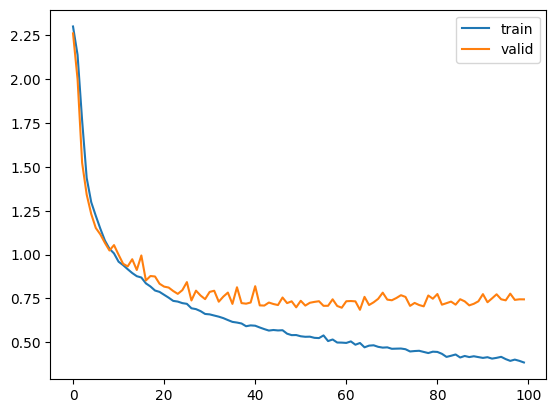

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [ ]:
## Predict the model on X_test data
y_pred=model.predict(X_test)

#Let's predict using argmax -
# Converts the probability vectors into class labels by taking the index of the highest value (i.e., the predicted class).
y_pred_arg=np.argmax(y_pred,axis=1)


563/563 [==============================] - 3s 5ms/step


**Confusion Matrix**

In [ ]:
# Classification report
cr=metrics.classification_report(y_test,y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1814
           1       0.74      0.87      0.80      1828
           2       0.82      0.83      0.82      1803
           3       0.73      0.78      0.75      1719
           4       0.84      0.86      0.85      1812
           5       0.77      0.77      0.77      1768
           6       0.85      0.77      0.81      1832
           7       0.85      0.84      0.85      1808
           8       0.77      0.76      0.76      1812
           9       0.86      0.73      0.79      1804

    accuracy                           0.80     18000
   macro avg       0.81      0.80      0.80     18000
weighted avg       0.81      0.80      0.80     18000



The report includes:

Precision: The proportion of true positive predictions out of all positive predictions.

Recall: The proportion of true positives out of all actual positives.

F1-score: The harmonic mean of precision and recall.

Support: The number of true occurrences of each class in the dataset.

The model performs reasonably well overall with an accuracy of 80%. Some digits (like 0, 2, 4, and 7) have better individual performance, while others (like 1, 3, and 9) show a trade-off between precision and recall. We might want to focus on improving the model's ability to distinguish those digits with lower precision or recall to boost overall performance. Analyzing the confusion matrix could provide further insights into specific misclassifications.

**Classification Report**

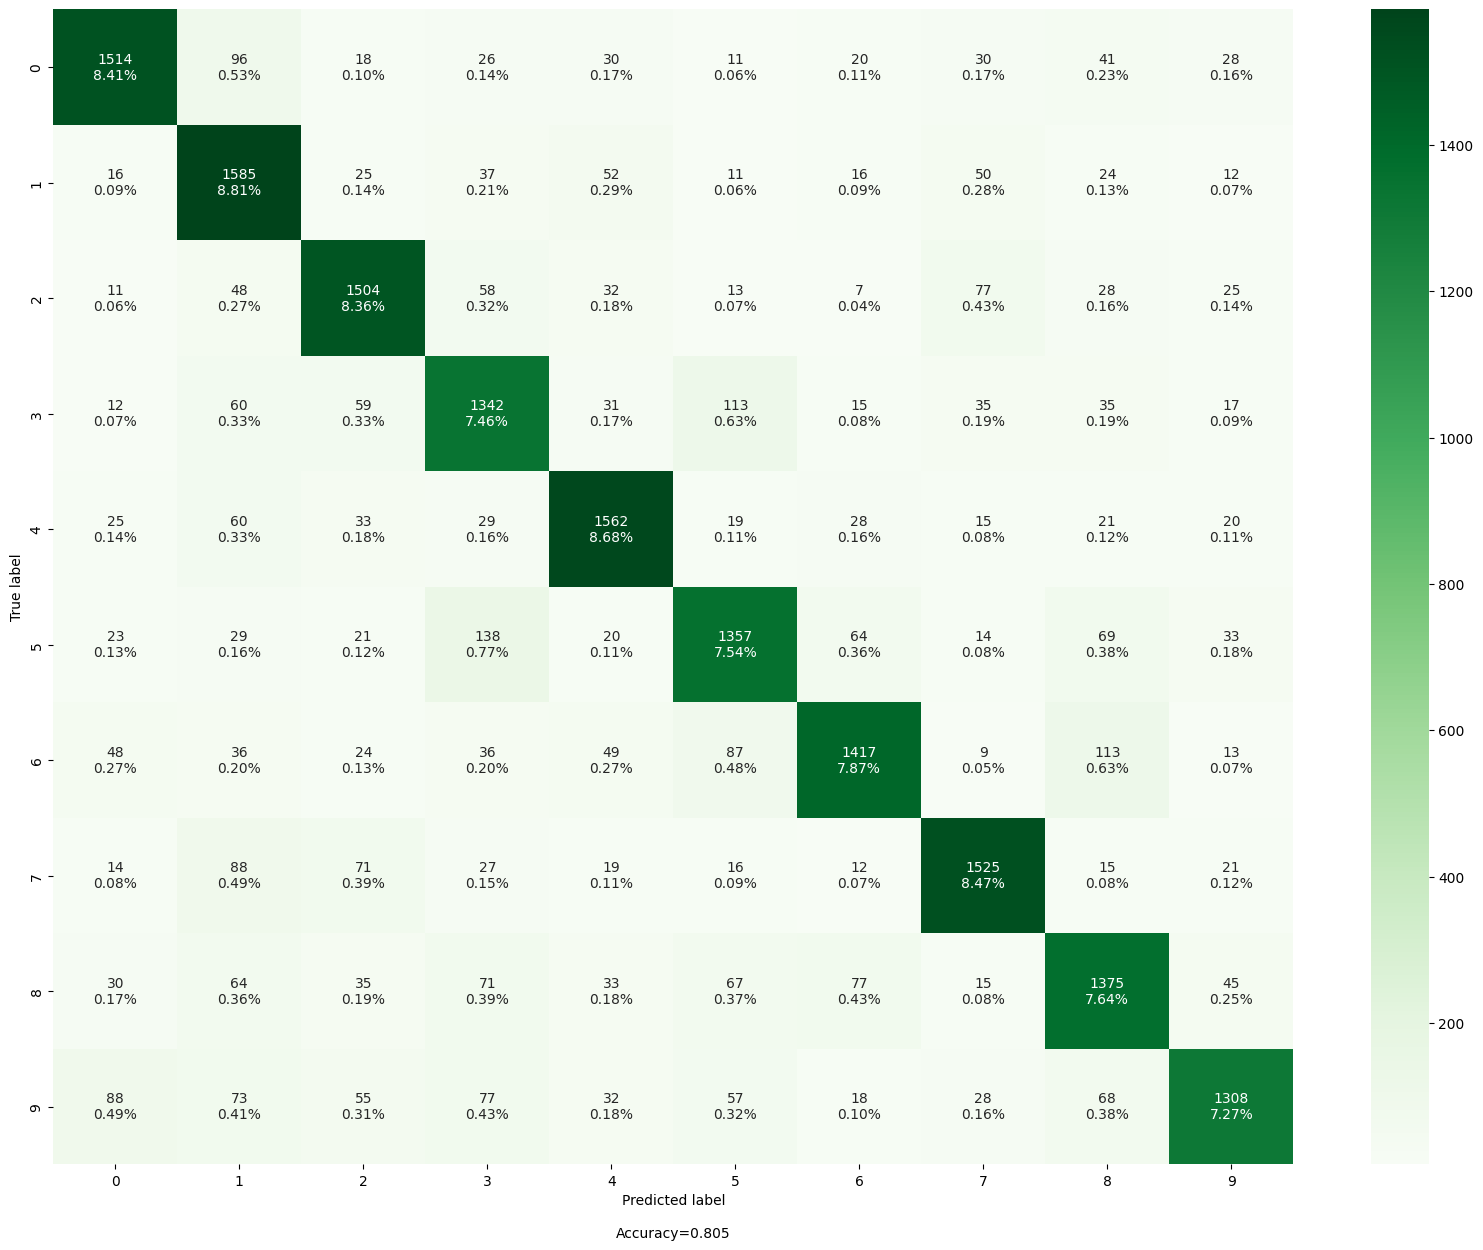

In [ ]:
## Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_arg)

# Plot the confusion matrix
make_confusion_matrix(cm, cmap='Greens')
plt.show()

The digit recognition model primarily confuses 3 and 5, 6 and 8 with minor confusion between 1, 2, and 7.

## Model Improvement: Neural Network model with Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_model():
      ## Initializing the neural network
      model = Sequential()

      # Input layer: 64 neurons, relu activation
      model.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))

      # hidden Layer: 64 neurons each, relu activation
      model.add(Dense(64,activation='relu'))


      # output layer with softmax as activation function with 10 neurons (We are predicting 10 classes)
      model.add(Dense(10, activation = 'softmax'))


      optimizer = tf.keras.optimizers.Adam(0.001)

      ## Complete the code to compile the model with binary cross entropy as loss function and accuracy as metrics
      model.compile(loss=losses.categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
      return model

In [ ]:
# Initializing the above function
model_2=create_model()
## Model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               131200    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 140106 (547.29 KB)
Trainable params: 140106 (547.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fit the model on X_train and y_train_en data for 100 epochs
history_2=model_2.fit(X_train, y_train_en, validation_split=0.2, epochs= 100, batch_size=128, verbose=2)

Epoch 1/100
263/263 - 3s - loss: 2.2927 - accuracy: 0.1166 - val_loss: 2.2328 - val_accuracy: 0.1635 - 3s/epoch - 12ms/step
Epoch 2/100
263/263 - 1s - loss: 1.9435 - accuracy: 0.3121 - val_loss: 1.7900 - val_accuracy: 0.3502 - 1s/epoch - 5ms/step
Epoch 3/100
263/263 - 2s - loss: 1.5893 - accuracy: 0.4719 - val_loss: 1.4884 - val_accuracy: 0.5133 - 2s/epoch - 6ms/step
Epoch 4/100
263/263 - 2s - loss: 1.4200 - accuracy: 0.5399 - val_loss: 1.3950 - val_accuracy: 0.5438 - 2s/epoch - 6ms/step
Epoch 5/100
263/263 - 2s - loss: 1.3042 - accuracy: 0.5883 - val_loss: 1.2658 - val_accuracy: 0.6046 - 2s/epoch - 6ms/step
Epoch 6/100
263/263 - 1s - loss: 1.2258 - accuracy: 0.6166 - val_loss: 1.2042 - val_accuracy: 0.6274 - 1s/epoch - 5ms/step
Epoch 7/100
263/263 - 1s - loss: 1.1710 - accuracy: 0.6393 - val_loss: 1.1609 - val_accuracy: 0.6405 - 1s/epoch - 6ms/step
Epoch 8/100
263/263 - 2s - loss: 1.1239 - accuracy: 0.6575 - val_loss: 1.0896 - val_accuracy: 0.6695 - 2s/epoch - 9ms/step
Epoch 9/100
263

**Loss function**

563/563 [==============================] - 2s 3ms/step - loss: 0.7245 - accuracy: 0.7928


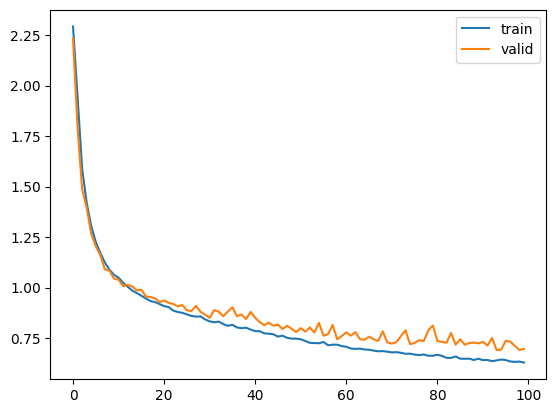

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_2.history)
hist['epoch'] = history_2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

## Complete the code to evaluate the model on X_test and y_test
results = model_2.evaluate(X_test, y_test_en)

In [ ]:
## Complete the code to predict the model on X_test
y_pred2=model_2.predict(X_test)

# predict using argmax -
y_pred_arg_2=np.argmax(y_pred2,axis=1)

563/563 [==============================] - 2s 3ms/step


**Classification report**

In [ ]:
# Classification report on y_test and y_pred_arg_2
cr=metrics.classification_report(y_test,y_pred_arg_2)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1814
           1       0.75      0.86      0.80      1828
           2       0.81      0.81      0.81      1803
           3       0.74      0.76      0.75      1719
           4       0.83      0.82      0.83      1812
           5       0.80      0.75      0.77      1768
           6       0.81      0.79      0.80      1832
           7       0.86      0.78      0.82      1808
           8       0.72      0.78      0.74      1812
           9       0.83      0.73      0.78      1804

    accuracy                           0.79     18000
   macro avg       0.80      0.79      0.79     18000
weighted avg       0.80      0.79      0.79     18000



**Confusion matrix**

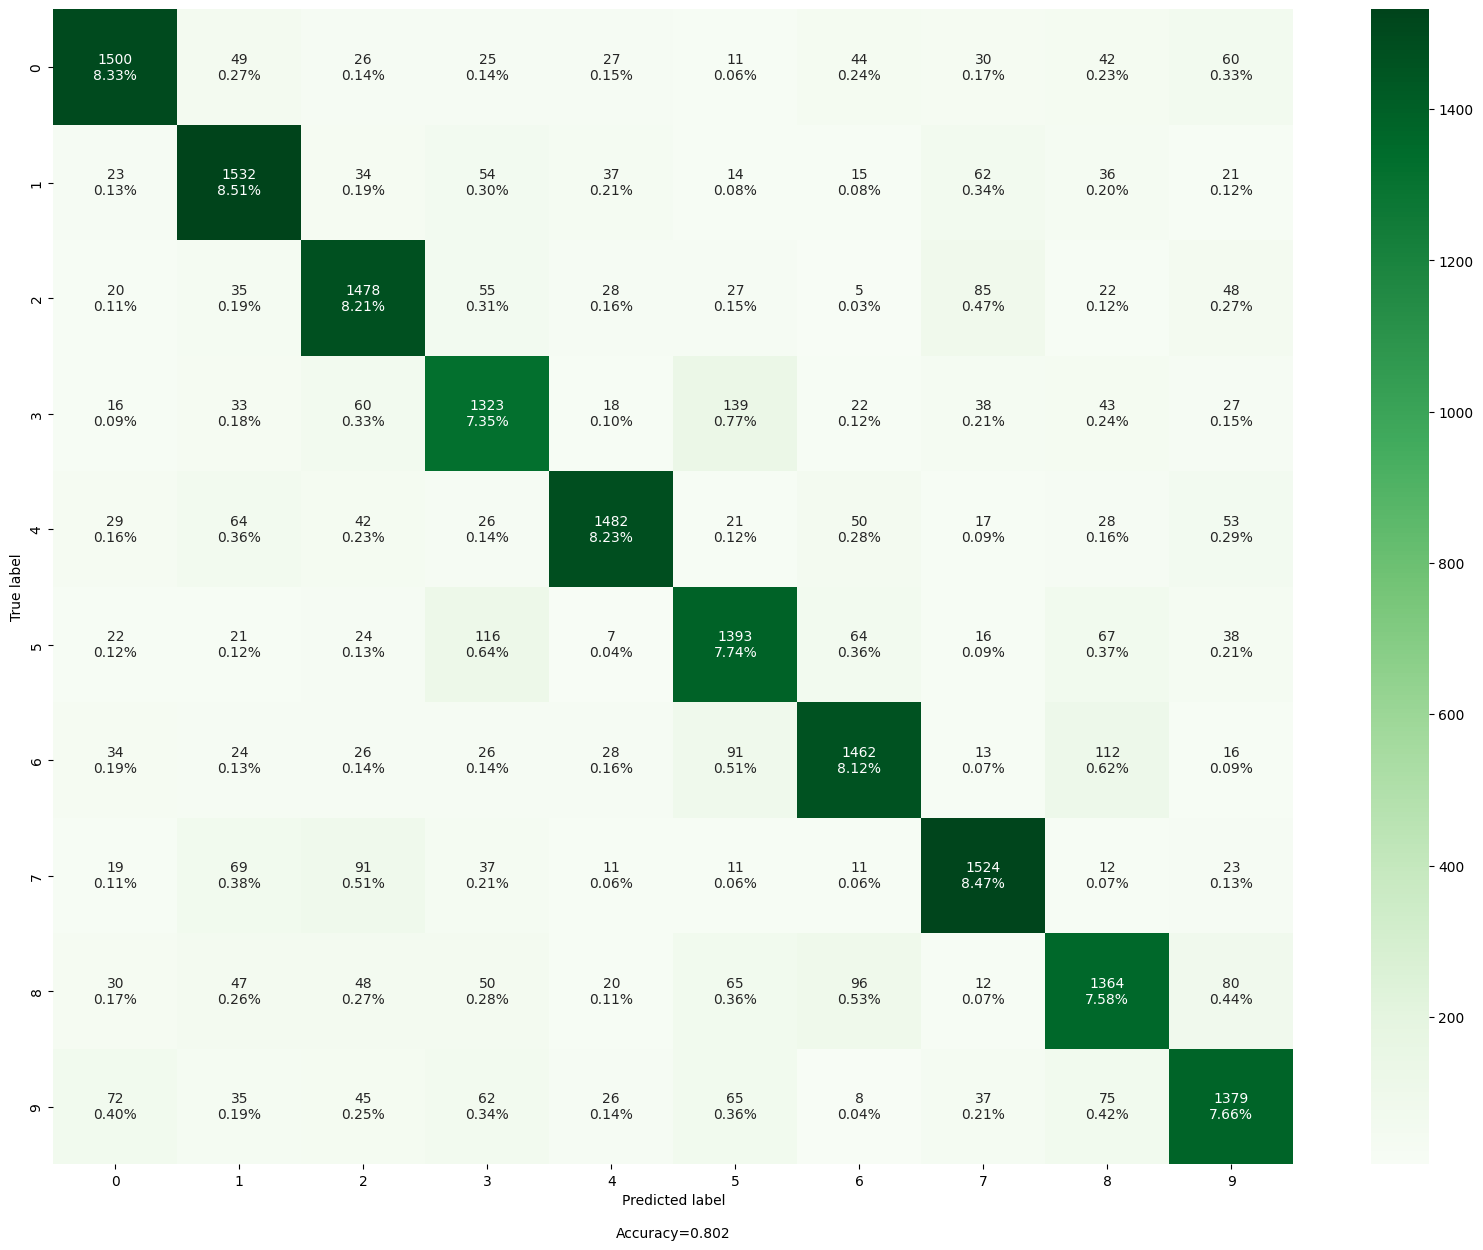

In [ ]:
# Classification report on y_test and y_pred_arg_2
cm2 = confusion_matrix(y_test, y_pred_arg_2)

# Confusion matrix
make_confusion_matrix(cm2, cmap='Greens')
plt.show()

Model 2, exhibits comparable overall performance to Model 1, with a slight trade-off in precision for improved recall in certain digits. Notably, Model 2 successfully addresses the overfitting issue observed in Model 1, demonstrating better generalization capabilities.

## Model Improvement: Neural Network model with Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
#Initializing the neural network
model_3 = Sequential()

# Add the input layer with 256 neurons and relu as activation function
model_3.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))

# Add dropout with dropout_rate= 0.3
model_3.add(Dropout(0.3))

# Add the hiden layer with 128 neurons and relu as activation function
model_3.add(Dense(128,activation='relu'))

# Add dropout with dropout_rate= 0.2
model_3.add(Dropout(0.2))

# Add the hiden layer with 64 neurons and relu as activation function
model_3.add(Dense(64,activation='relu'))

# Add dropout with the dropout_rate = 0.1
model_3.add(Dropout(0.1))

# Add the output layer with softmax as activation function with 10 neurons.
model_3.add(Dense(10, activation = 'softmax'))

In [ ]:
## Summary of the model_3
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               262400    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 10)               

In [ ]:
# Initialize the ANN with Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Compile the model with categorical cross entropy as loss function and accuracy as metrics
model_3.compile(loss=losses.categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])

In [ ]:
# Fit the model on X_train and y_train_en with 100 epochs
history_3 = model_3.fit(X_train,y_train_en,batch_size=128,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
263/263 [==============================] - 6s 18ms/step - loss: 2.3075 - accuracy: 0.1016 - val_loss: 2.2975 - val_accuracy: 0.0812
Epoch 2/100
263/263 [==============================] - 4s 16ms/step - loss: 2.2626 - accuracy: 0.1188 - val_loss: 2.2231 - val_accuracy: 0.1318
Epoch 3/100
263/263 [==============================] - 3s 11ms/step - loss: 2.2477 - accuracy: 0.1266 - val_loss: 2.1902 - val_accuracy: 0.1770
Epoch 4/100
263/263 [==============================] - 3s 11ms/step - loss: 2.2092 - accuracy: 0.1473 - val_loss: 2.1474 - val_accuracy: 0.1890
Epoch 5/100
263/263 [==============================] - 3s 11ms/step - loss: 2.1967 - accuracy: 0.1550 - val_loss: 2.1531 - val_accuracy: 0.1801
Epoch 6/100
263/263 [==============================] - 4s 17ms/step - loss: 2.1963 - accuracy: 0.1543 - val_loss: 2.1498 - val_accuracy: 0.1883
Epoch 7/100
263/263 [==============================] - 5s 18ms/step - loss: 2.1890 - accuracy: 0.1567 - val_loss: 2.1357 - val_accuracy:

**Loss function**

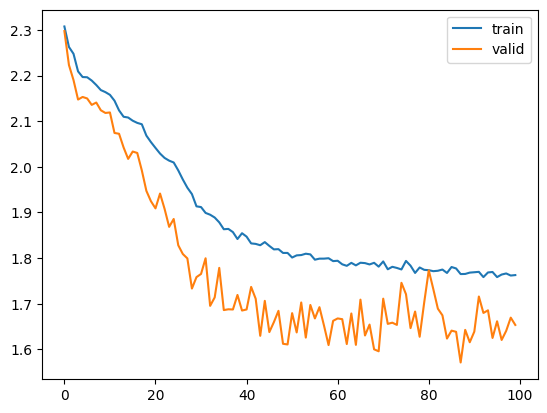

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_3.history)
hist['epoch'] = history_3.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [ ]:
## Complete the code to predict the model on X_test
y_pred3=model_3.predict(X_test)

## Complete the code to the y_pred3 predict using argmax
y_pred_arg_3=np.argmax(y_pred3,axis=1)

563/563 [==============================] - 1s 2ms/step


**Classification report**

In [ ]:
# Classification report on y_test and y_pred_arg_3
cr=metrics.classification_report(y_test,y_pred_arg_3)
print(cr)

              precision    recall  f1-score   support

           0       0.31      0.37      0.34      1814
           1       0.52      0.50      0.51      1828
           2       0.36      0.43      0.39      1803
           3       0.42      0.49      0.45      1719
           4       0.61      0.57      0.59      1812
           5       0.46      0.42      0.44      1768
           6       0.59      0.39      0.47      1832
           7       0.52      0.55      0.54      1808
           8       0.36      0.29      0.32      1812
           9       0.36      0.40      0.38      1804

    accuracy                           0.44     18000
   macro avg       0.45      0.44      0.44     18000
weighted avg       0.45      0.44      0.44     18000



**Confusion Matrix**

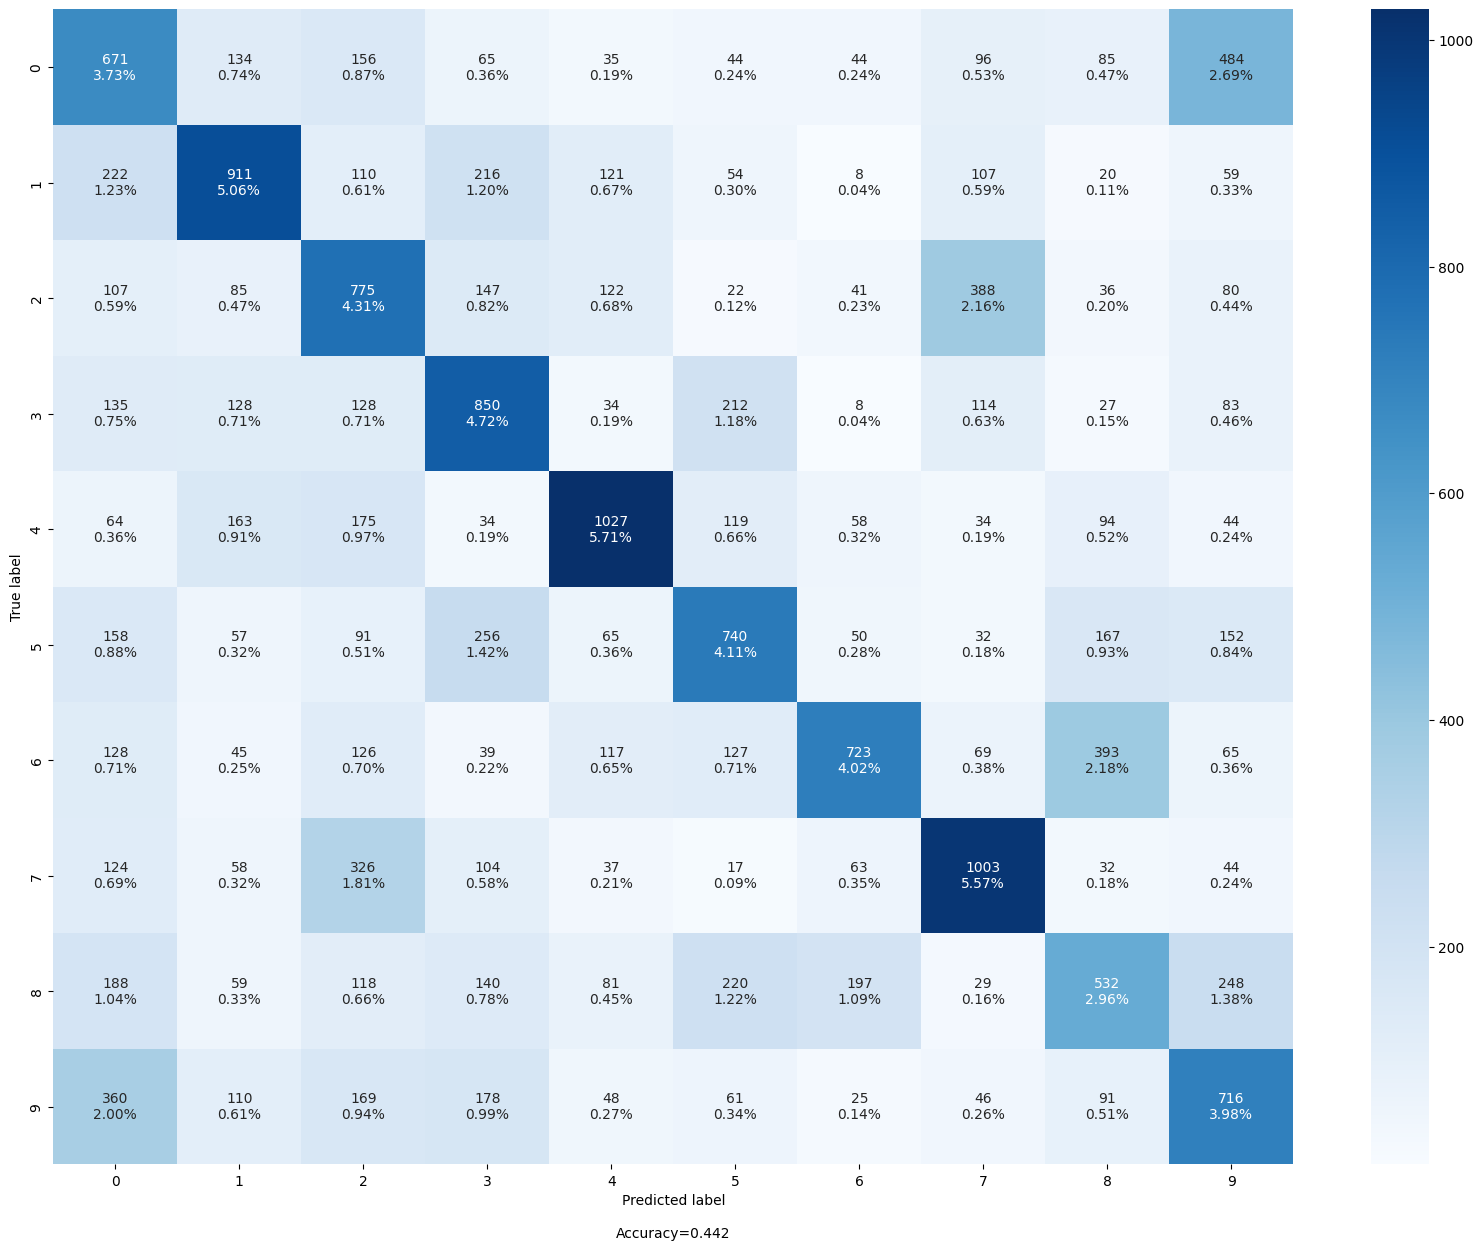

In [ ]:
# classification report on y_test and y_pred_arg_3
cm3 = confusion_matrix(y_test, y_pred_arg_3)

# confusion matrix
make_confusion_matrix(cm3, cmap='Blues')
plt.show()

## Final Model selection

Model Comparison:
Let’s review:

Model 1 (Baseline):

Training Accuracy: Likely high (~80%).
Validation Accuracy: Reported around 77%, but validation loss may diverge from training loss.

Model 2 (Improved with smaller architecture):

Training and Validation Accuracy: Both converge to around 66%, indicating no overfitting.
However, accuracy is lower compared to Model 1.

Model 3 (Dropout Regularization):

Accuracy: 10%, indicating severe underfitting.

Since Model 2 shows consistent training and validation losses throughout the iterations without a significant performance drop, it indicates that Model 2 may have generalized better, despite having a lower absolute accuracy compared to the baseline. Therefore:

we can Select Model 2 if avoiding overfitting is the primary concern.

or We can Select Model 1 if we are willing to accept some overfitting for higher absolute accuracy.

## Insights and Recommendations

Given the concern for overfitting in Model 1 (baseline) and the potential better generalization in Model 2, the next steps should focus on improving generalization while aiming to increase the overall accuracy

1. Model Architecture and Complexity:
Increase the depth of Model 2 by adding an extra hidden layer with a reasonable number of neurons (e.g., 64 or 128) to enhance its learning capacity without overfitting.
Batch Normalization: Add batch normalization after each dense layer to stabilize learning and improve generalization.
Dropout Regularization: Instead of aggressive dropout as in Model 3, apply a smaller dropout rate (e.g., 0.1 to 0.3).

2. Learning Rate Tuning:
Use learning rate schedulers to dynamically adjust the learning rate during training:
Start with a slightly higher learning rate (e.g., 0.01) and reduce it based on validation performance.
Example: Reduce LR On Plateau in Keras to lower the learning rate when validation accuracy stops improving.

3. Early Stopping:
Implement early stopping with a patience of 10–15 epochs to avoid unnecessary training if the validation performance plateaus.

4. Training and Batch Size:
Experiment with different batch sizes (e.g., 32 or 64) to strike a balance between training speed and model performance.
Increase the number of epochs for well-generalizing models if they still show improving validation performance.

---------------

In [ ]:
# Model 3 With Improvements from above

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Initialize the neural network
model_3 = Sequential()

# Input layer with 32 neurons and relu activation
model_3.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))

# Dropout layer with reduced rate of 0.1
model_3.add(Dropout(0.1))

# Hidden layer with 32 neurons and relu activation
model_3.add(Dense(32, activation='relu'))

# Dropout layer with reduced rate of 0.1
model_3.add(Dropout(0.1))

# Hidden layer with 16 neurons and relu activation
model_3.add(Dense(16, activation='relu'))

# Output layer with 10 neurons (softmax for multi-class classification)
model_3.add(Dense(10, activation='softmax'))

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)
model_3.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early stopping to prevent overfitting and reduce training time
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reduce learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Train the model with callbacks
history_3 = model_3.fit(
    X_train, y_train_en,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=2
)


Epoch 1/100
1050/1050 - 5s - 5ms/step - accuracy: 0.0979 - loss: 2.3039 - val_accuracy: 0.0976 - val_loss: 2.3029 - learning_rate: 0.0010
Epoch 2/100
1050/1050 - 4s - 4ms/step - accuracy: 0.0987 - loss: 2.3028 - val_accuracy: 0.0976 - val_loss: 2.3029 - learning_rate: 0.0010
Epoch 3/100
1050/1050 - 3s - 2ms/step - accuracy: 0.0994 - loss: 2.3028 - val_accuracy: 0.0976 - val_loss: 2.3029 - learning_rate: 0.0010
Epoch 4/100
1050/1050 - 3s - 2ms/step - accuracy: 0.1001 - loss: 2.3028 - val_accuracy: 0.0976 - val_loss: 2.3029 - learning_rate: 0.0010
Epoch 5/100
1050/1050 - 8s - 7ms/step - accuracy: 0.0999 - loss: 2.3027 - val_accuracy: 0.0976 - val_loss: 2.3029 - learning_rate: 0.0010
Epoch 6/100
1050/1050 - 4s - 4ms/step - accuracy: 0.0997 - loss: 2.3027 - val_accuracy: 0.0976 - val_loss: 2.3028 - learning_rate: 0.0010
Epoch 7/100
1050/1050 - 7s - 6ms/step - accuracy: 0.1000 - loss: 2.3027 - val_accuracy: 0.1014 - val_loss: 2.3028 - learning_rate: 5.0000e-04
Epoch 8/100
1050/1050 - 4s - 4

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1814
           1       0.00      0.00      0.00      1828
           2       0.00      0.00      0.00      1803
           3       0.10      1.00      0.17      1719
           4       0.00      0.00      0.00      1812
           5       0.00      0.00      0.00      1768
           6       0.00      0.00      0.00      1832
           7       0.00      0.00      0.00      1808
           8       0.00      0.00      0.00      1812
           9       0.00      0.00      0.00      1804

    accuracy                           0.10     18000
   macro avg       0.01      0.10      0.02     18000
weighted avg       0.01      0.10      0.02     18000

Confusion Matrix:


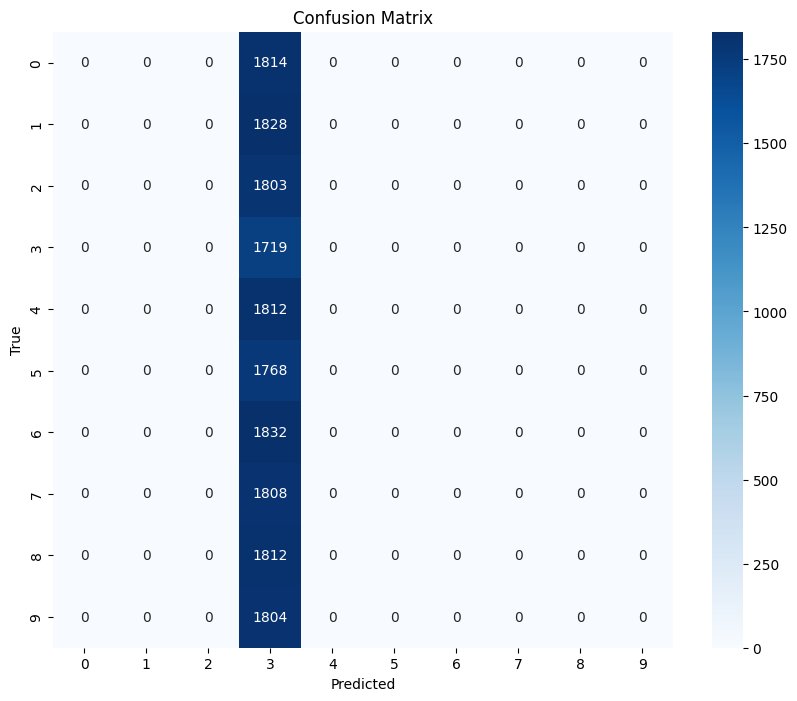

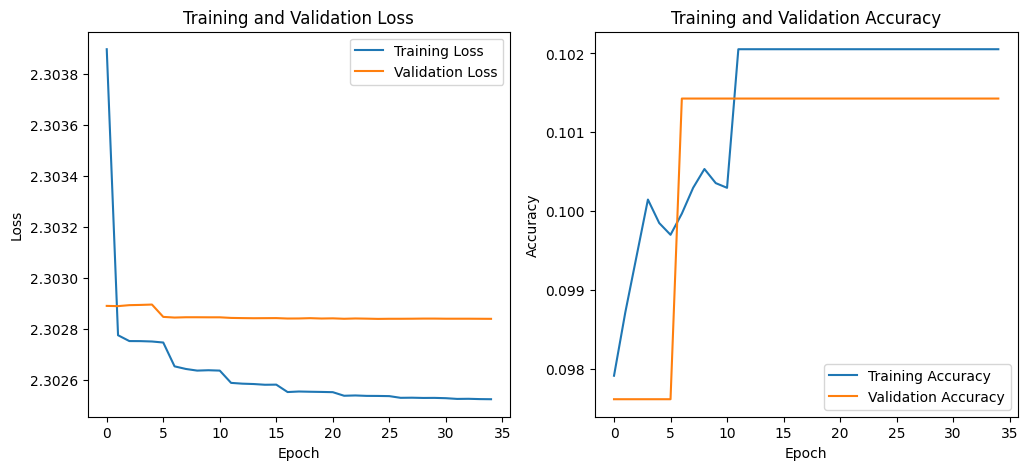

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Predict the labels for the test set
y_pred3 = model_3.predict(X_test)
y_pred_arg_3 = np.argmax(y_pred3, axis=1)  # Convert probabilities to class labels

# 2. Classification report
print("Classification Report:")
cr = classification_report(y_test, y_pred_arg_3)
print(cr)

# 3. Confusion matrix
print("Confusion Matrix:")
cm3 = confusion_matrix(y_test, y_pred_arg_3)

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot the confusion matrix
labels = list(range(10))  # Digits 0-9
plot_confusion_matrix(cm3, labels)

# 4. Plot training and validation loss/accuracy curves
def plot_learning_curves(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    # Loss curves
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(hist['epoch'], hist['loss'], label='Training Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    # Accuracy curves
    plt.subplot(1, 2, 2)
    plt.plot(hist['epoch'], hist['accuracy'], label='Training Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.show()

# Plot the learning curves
plot_learning_curves(history_3)


Model 3 did not improve because the architecture is too simple for the complexity of the SVHN dataset, which contains rich spatial features that fully connected layers alone cannot effectively capture. Additionally, even with reduced dropout rates, placing dropout early in the network can hinder learning. The SVHN dataset typically benefits from convolutional neural networks (CNNs) that excel at extracting spatial features from images. Furthermore, data augmentation, such as random shifts and rotations, can improve generalization by increasing data diversity. Finally, optimizers like Adam may need adjusted learning rates or alternative approaches, such as RMSProp or SGD with momentum, to converge better. Implementing CNN layers, using data augmentation, and adjusting training parameters like early stopping patience can significantly improve performance.